В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andrianazadorozhna
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 75.0MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


In [ ]:
import os

In [ ]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-2'

In [ ]:
os.listdir(data_dir)

['train.csv', 'sample_submission.csv', 'test.csv']

In [ ]:
train_csv = data_dir + '/train.csv'

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [ ]:
import importlib
import process_bank_churn
importlib.reload(process_bank_churn)

<module 'process_bank_churn' from '/content/process_bank_churn.py'>

In [ ]:
from process_bank_churn import preprocess_data, preprocess_new_data

processed_data = preprocess_data(raw_df)

X_train = processed_data['train_X']
y_train = processed_data['train_y']
X_val = processed_data['val_X']
y_val = processed_data['val_y']

/content/process_bank_churn.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
/content/process_bank_churn.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])
/content/process_bank_churn.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn_model.predict_proba(X_train)[:, 1]
y_val_pred = knn_model.predict_proba(X_val)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_val, y_val_pred)

In [ ]:
print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

Train AUROC: 0.8234
Validation AUROC: 0.5517


In [ ]:
if train_auc > 0.9 and val_auc < 0.75:
    print("Модель перенавчена (high variance).")
elif train_auc < 0.7 and val_auc < 0.7:
    print("Модель недонавчена (high bias).")
else:
    print("Модель має хороший баланс між bias і variance.")

Модель має хороший баланс між bias і variance.


2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Псотавте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': range(1, 31)}

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='roc_auc')

In [ ]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Найкраще значення n_neighbors: {best_n_neighbors}")

Найкраще значення n_neighbors: 1


In [ ]:
knn_best = grid_search.best_estimator_

In [ ]:
y_train_pred = knn_best.predict_proba(X_train)[:, 1]
y_val_pred = knn_best.predict_proba(X_val)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_val, y_val_pred)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

Train AUROC: 1.0000
Validation AUROC: 0.5469


In [ ]:
if train_auc > 0.9 and val_auc < 0.75:
    print("Модель перенавчена (high variance).")
elif train_auc < 0.7 and val_auc < 0.7:
    print("Модель недонавчена (high bias).")
else:
    print("Модель має хороший баланс між bias і variance.")

Модель перенавчена (high variance).


3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_state`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
param_grid = {
    'max_depth': range(1, 21, 2),
    'max_leaf_nodes': range(2, 11, 1)
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

In [ ]:
best_params = grid_search.best_params_
print(f"Найкращі параметри: {best_params}")
print(f"Час виконання GridSearchCV: {end_time - start_time:.2f} секунд")

Найкращі параметри: {'max_depth': 5, 'max_leaf_nodes': 10}
Час виконання GridSearchCV: 6.19 секунд


In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
y_train_pred = dt_best.predict_proba(X_train)[:, 1]
y_val_pred = dt_best.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_val, y_val_pred)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

Train AUROC: 0.9041
Validation AUROC: 0.9112


In [ ]:
if train_auc > 0.9 and val_auc < 0.75:
    print("Модель перенавчена (high variance).")
elif train_auc < 0.7 and val_auc < 0.7:
    print("Модель недонавчена (high bias).")
else:
    print("Модель має хороший баланс між bias і variance.")

Модель має хороший баланс між bias і variance.


4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(dt, params_dt, n_iter=40, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

In [ ]:
best_params = random_search.best_params_
print(f"Найкращі параметри: {best_params}")
print(f"Час виконання RandomizedSearchCV: {end_time - start_time:.2f} секунд")

Найкращі параметри: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': 14, 'max_features': None, 'max_depth': 16, 'criterion': 'entropy'}
Час виконання RandomizedSearchCV: 3.54 секунд


In [ ]:
dt_random_search_best = random_search.best_estimator_

In [ ]:
y_train_pred = dt_random_search_best.predict_proba(X_train)[:, 1]
y_val_pred = dt_random_search_best.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_val, y_val_pred)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

Train AUROC: 0.9181
Validation AUROC: 0.9211


In [ ]:
if train_auc > 0.9 and val_auc < 0.75:
    print("Модель перенавчена (high variance).")
elif train_auc < 0.7 and val_auc < 0.7:
    print("Модель недонавчена (high bias).")
else:
    print("Модель має хороший баланс між bias і variance.")

Модель має хороший баланс між bias і variance.


5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

In [ ]:
test_csv = data_dir + '/test.csv'
test_df = pd.read_csv(test_csv)

In [ ]:
new_processed_data = preprocess_new_data(
    test_df,
    processed_data['scaler'],
    processed_data['encoder'],
    processed_data['numeric_cols'],
    processed_data['categorical_cols']
)

In [ ]:
test_ids = new_processed_data["id"]

test_predictions = dt_random_search_best.predict_proba(new_processed_data)[:, 1]

submission_df = pd.DataFrame({"id": test_ids, "exited": test_predictions})

print(submission_df.head())

      id    exited
0  15000  0.264069
1  15001  0.016621
2  15002  0.151613
3  15003  0.567010
4  15004  0.079245


In [ ]:
submission_df.to_csv("submission.csv", index=False)

import os
print("Файл submission.csv збережено:", os.path.exists("submission.csv"))

Файл submission.csv збережено: True


In [ ]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

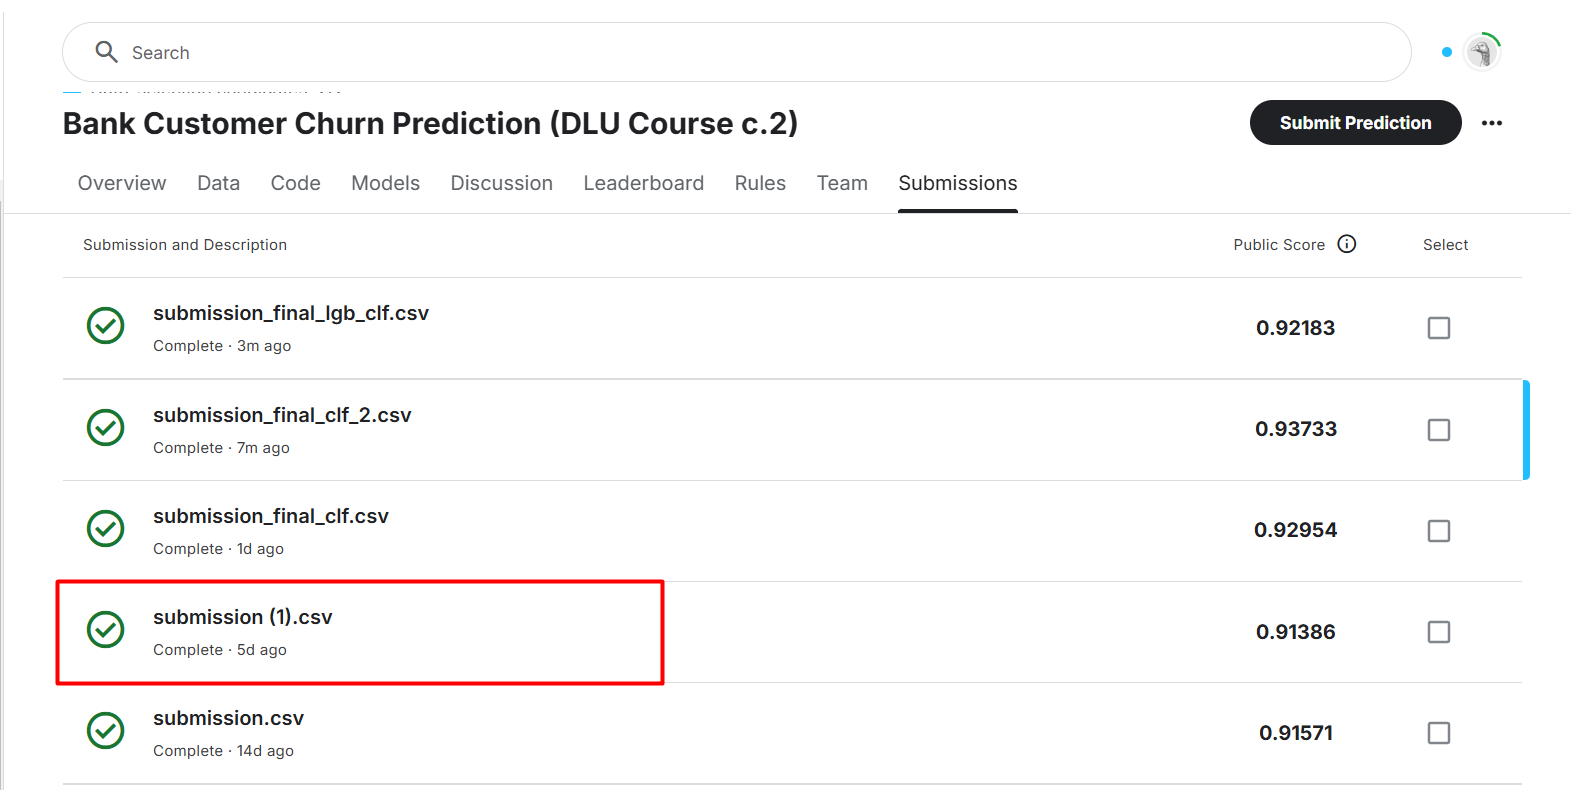

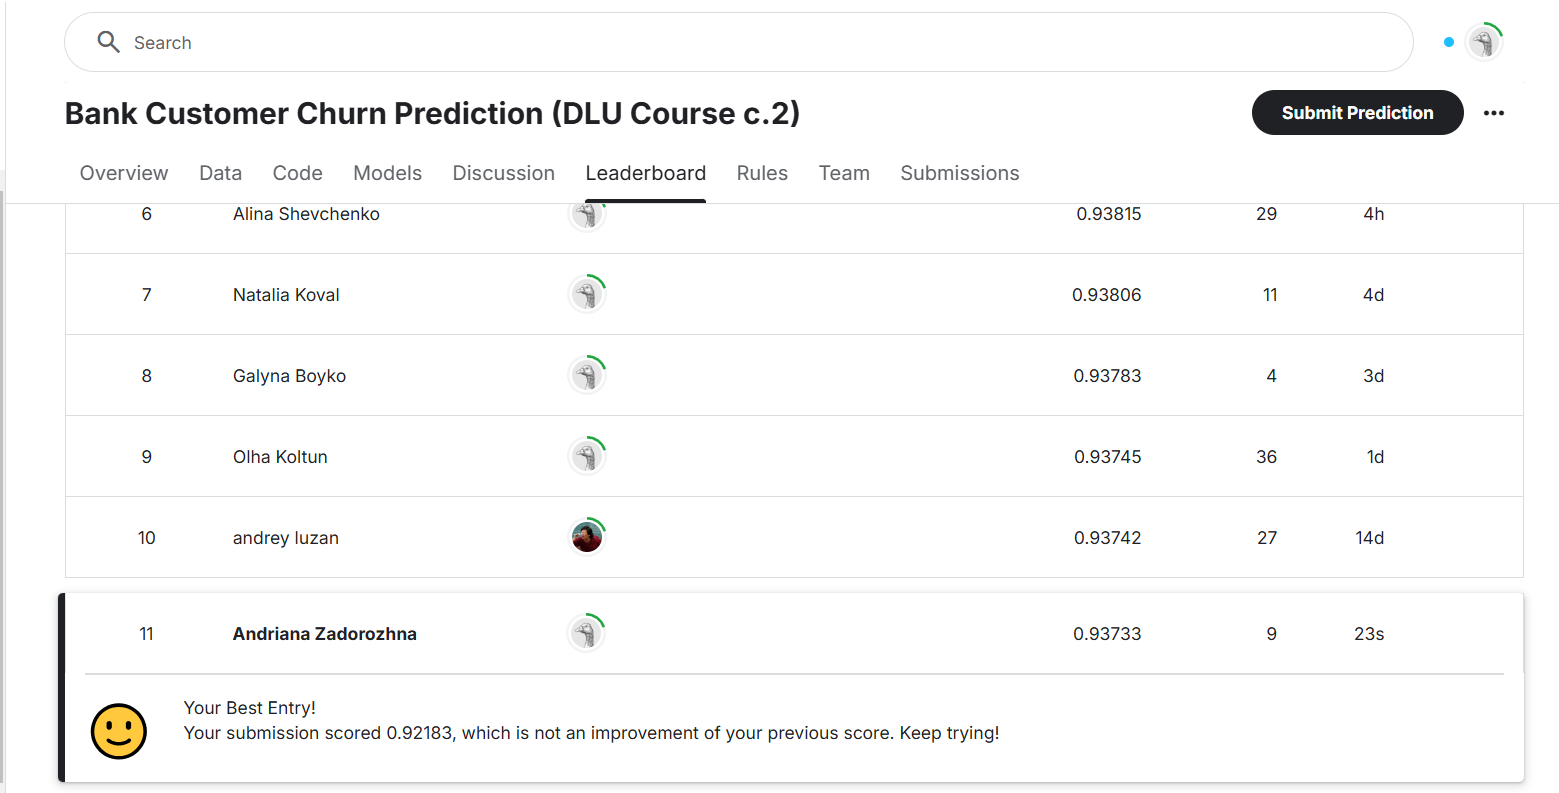